### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.svm import SVC 
from statsmodels.api import OLS
from sklearn import preprocessing
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import plot_tree
from sklearn.metrics import accuracy_score

### Loading the datasets

In [ ]:
train_data = pd.read_csv("train.csv")
print("Training dataset")
print("")
train_data.head()

Training dataset



,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
test_data = pd.read_csv("test.csv")
print("")
print("Testing dataset")
print("")
test_data.head()


Testing dataset



,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


### Removing null values

In [ ]:
#removing null columns which are having values greater than 20% from training
train_data_null_percentage = train_data.isnull().sum()/len(train_data)*100
train_data_null_percentage = train_data_null_percentage[train_data_null_percentage > 20].keys()
train_data = train_data.drop(train_data_null_percentage, axis=1)
train_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
#removing null columns which are having values greater than 20% from testing
test_data_null_percentage = test_data.isnull().sum()/len(test_data)*100
test_data_null_percentage = test_data_null_percentage[test_data_null_percentage > 20].keys()
test_data = test_data.drop(test_data_null_percentage, axis=1)
test_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Filling remaining missing values with mean for train data
train_data = train_data.fillna(train_data.mean())
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
# Filling remaining missing values with mean for test data
test_data = test_data.fillna(test_data.mean())
test_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


### Converting categorical data into numerical data

In [ ]:
train_data = pd.get_dummies(train_data, columns = ['Product_Info_2'])
train_data

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,1,0,0
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,1
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,1,0
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,...,0,0,0,0,0,1,0,0,0,0
59377,79143,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,...,0,0,0,0,0,0,0,1,0,0
59378,79144,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,...,0,0,0,0,0,0,0,0,0,1
59379,79145,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_data = pd.get_dummies(test_data, columns = ['Product_Info_2'])
test_data

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,1,1,26,0.487179,2,3,1,0.611940,0.781818,0.338912,...,0,0,0,0,0,0,0,1,0,0
1,3,1,26,0.076923,2,3,1,0.626866,0.727273,0.311715,...,0,0,0,0,0,0,0,0,0,0
2,4,1,26,0.144667,2,3,1,0.582090,0.709091,0.320084,...,0,0,0,0,0,0,0,1,0,0
3,9,1,26,0.151709,2,1,1,0.522388,0.654545,0.267782,...,0,0,0,0,0,0,0,0,0,0
4,12,1,26,0.076923,2,3,1,0.298507,0.672727,0.246862,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,79093,1,26,0.128205,2,3,1,0.537313,0.636364,0.152720,...,0,0,0,0,0,0,0,1,0,0
19761,79099,1,10,0.230769,2,3,1,0.134328,0.618182,0.225941,...,0,0,0,0,0,0,0,0,1,0
19762,79102,1,26,0.076923,2,3,1,0.850746,0.727273,0.414226,...,0,0,0,0,0,0,0,0,0,0
19763,79125,1,26,0.487179,2,3,1,0.522388,0.745455,0.529289,...,0,0,0,0,0,1,0,0,0,0


### Removing the outliers

In [ ]:
#removing unwanted data for train data
cols = train_data.columns
def outliers_calculation_train(col, df):
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  try:
    df[df[col] > upper_limit]
    df[df[col] < lower_limit]
    train_data = df[df[col] < upper_limit]
  except:
    return

for column_names in cols:
  outliers_calculation_train(column_names, train_data)

#removing unwanted data for test data
cols = test_data.columns
def outliers_calculation_test(col, df):
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  try:
    df[df[col] > upper_limit]
    df[df[col] < lower_limit]
    test_data = df[df[col] < upper_limit]
  except:
    return

for column_names in cols:
  outliers_calculation_train(column_names, test_data)

### Applying linear regression

In [ ]:
#applying linear regression

y = train_data["Response"]
x = train_data.drop(["Response"], axis = 1)

lm = linear_model.LinearRegression()
x = preprocessing.normalize(x)
test_data = preprocessing.normalize(test_data)

lm.fit(x,y)
pred = lm.predict(test_data)
print(pred)

[-99.6064203    0.85757469   5.37518079 ...   5.60437429   5.62086423
   5.61694669]


### Applying XGBoost 

[7 8 8 ... 1 5 6]


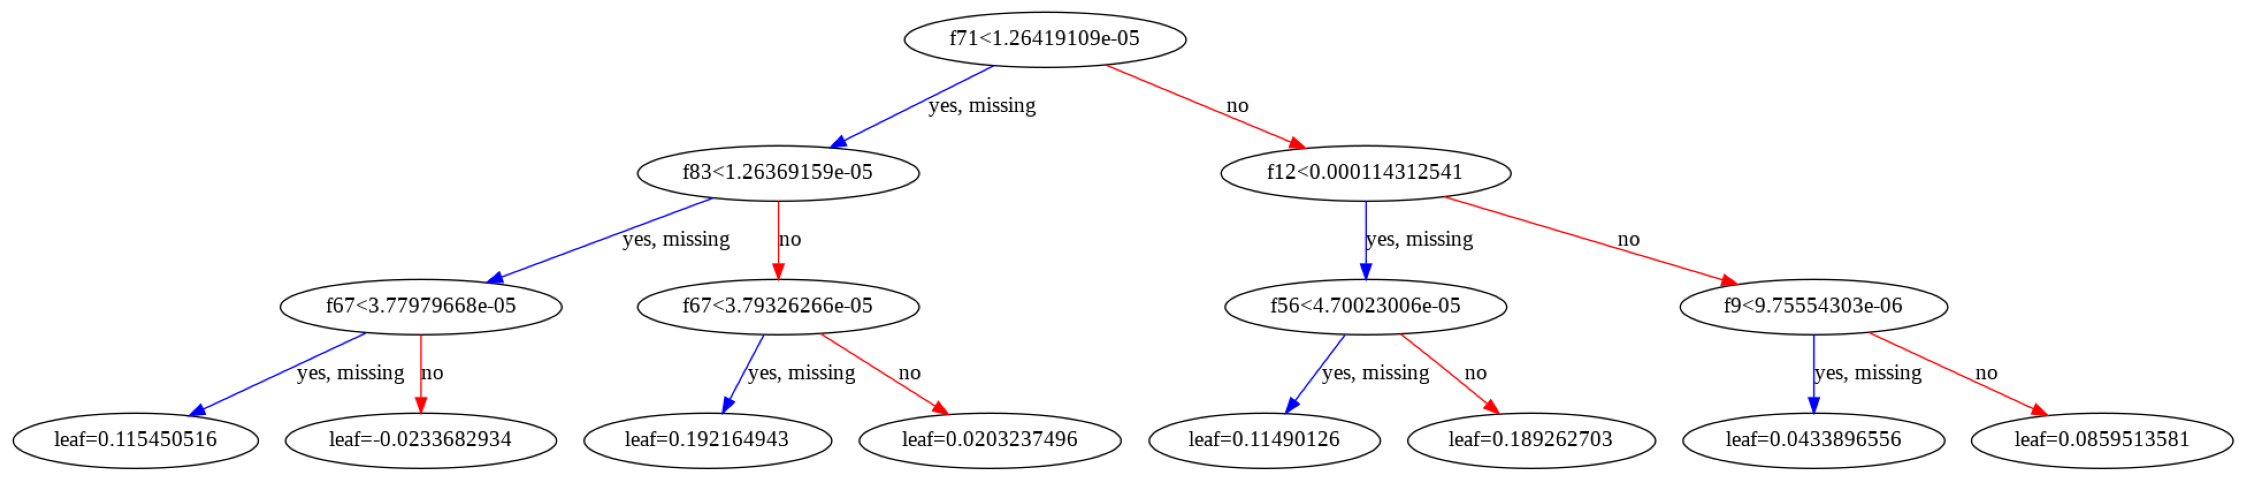

In [ ]:
model = XGBClassifier()
model.fit(x, y)
pred = model.predict(test_data)
print(pred)
plot_tree(model)
plt.rcParams["figure.figsize"] = [40,25]
plt.show()

[17:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[5.169077  6.0193987 5.5135098 ... 2.6505857 4.806438  4.6444974]


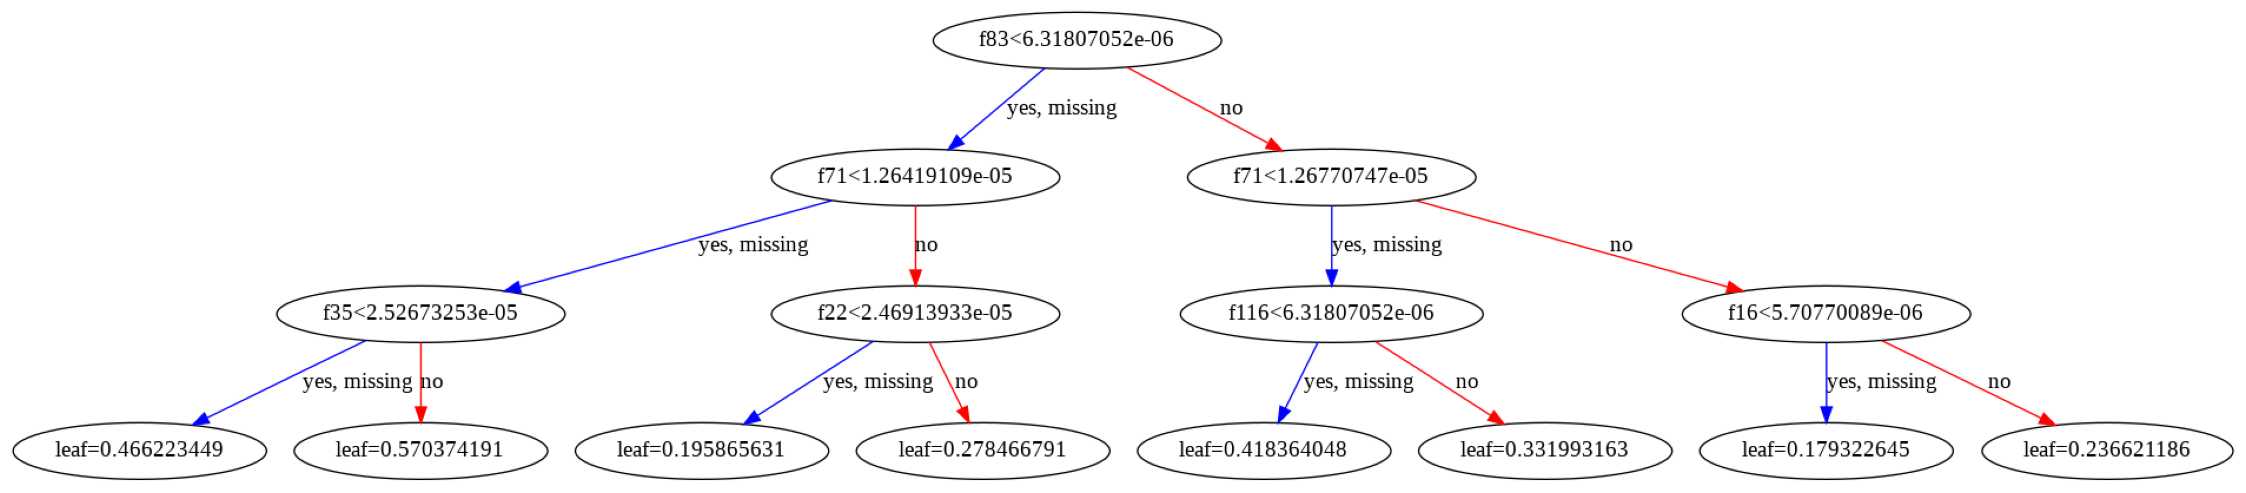

In [ ]:
model = XGBRegressor(max_depth=3)
model.fit(x, y)
pred = model.predict(test_data)
print(pred)
plot_tree(model)
plt.rcParams['figure.figsize'] = [40,25]
plt.show()

### Applying SVM using linear kernel

In [ ]:
#applying SVM model Linear kernel
clf = SVC(kernel="linear", C=0.1)
clf.fit(x, y)
pred = clf.predict(test_data)
print(pred)

[8 8 8 ... 8 8 8]


In [ ]:
#applying SVM model sigmoid kernel
clf = SVC(kernel="sigmoid", C=0.1)
clf.fit(x, y)
pred = clf.predict(test_data)
print(pred)

[8 6 6 ... 8 8 8]


In [ ]:
#applying SVM model polynomial kernel
clf = SVC(kernel="poly", C=0.1)
clf.fit(x, y)
pred = clf.predict(test_data)
print(pred)

[8 8 8 ... 8 8 8]


In [ ]:
#applying SVM model RBF kernel
clf = SVC(C=0.1)
clf.fit(x, y)
pred = clf.predict(test_data)
print(pred)

[8 8 8 ... 8 8 8]


### Applying logistic regrerssion

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(x, y)
pred = lr.predict(test_data)
print(pred)

[6 8 8 ... 8 8 8]
